# Comparison of the molecular domain between cell lines and tumors for breast cancer

In [1]:
# Tissue to consider
tumor_type = 'Breast'
cell_line_type = 'BRCA'
pdx_type = 'BRCA'

# Normalization parameters
normalization = 'TMM'
transformation = 'log'
mean_center = True
std_unit = False
protein_coding_only = True
filter_mytochondrial = False

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA, FastICA, SparsePCA
import matplotlib.cm as cm
import pickle
import scipy
plt.style.use('ggplot')


#Import src implementations
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from data_reader.read_data import read_data
from normalization_methods.feature_engineering import feature_engineering
from precise import PVComputation

## Import data

In [3]:
# Import tumor + cell line data (RNA-seq)
X_tumors_rnaseq, X_cell_lines_rnaseq, gene_names_rnaseq, cell_lines_names, tumor_names = read_data('cell_line',
                                                                           'tumor',
                                                                           'count',
                                                                            None if cell_line_type == 'All' else cell_line_type,
                                                                            tumor_type,
                                                                            filter_mytochondrial)
print('Count data imported')


# Import tumor + pdx data (FPKM)
X_tumors_fpkm, X_pdx_fpkm, gene_names_fpkm, fpkm_names, tumor_names = read_data('pdx',
                                                                          'tumor',
                                                                          'fpkm',
                                                                          pdx_type,
                                                                          tumor_type,
                                                                          filter_mytochondrial)
print('FPKM data imported')

Count data imported
FPKM data imported


In [4]:
# Normalization & Transformation for RNA-Seq data
X_tumors_rnaseq = feature_engineering(X_tumors_rnaseq, normalization, transformation, mean_center, std_unit)
X_cell_lines_rnaseq = feature_engineering(X_cell_lines_rnaseq, normalization, transformation, mean_center, std_unit)

# Transformation only for FPKM data
X_tumors_fpkm = feature_engineering(X_tumors_fpkm, 'None', transformation, mean_center, std_unit)
X_pdx_fpkm = feature_engineering(X_pdx_fpkm, 'None', transformation, mean_center, std_unit)

ERROR: not an available normalization method
ERROR: not an available normalization method


## Compute principal vectors

In [5]:
n_factors = 20
n_pv = 20
dim_reduction = 'pca'
dim_reduction_target = 'pca'

pv_cell_lines = PVComputation(
    n_factors = n_factors,
    n_pv = n_pv,
    dim_reduction = dim_reduction,
    dim_reduction_target = dim_reduction_target
)

pv_pdx = PVComputation(
    n_factors = n_factors,
    n_pv = n_pv,
    dim_reduction = dim_reduction,
    dim_reduction_target = dim_reduction_target
)

In [6]:
pv_cell_lines.fit(X_cell_lines_rnaseq, X_tumors_rnaseq)
pv_pdx.fit(X_pdx_fpkm, X_tumors_fpkm)

## Cosine similarity of principal vectors

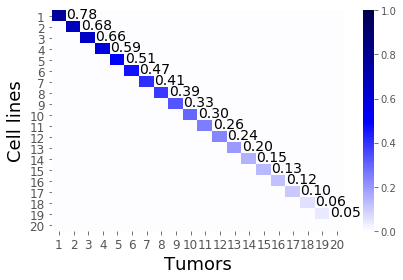

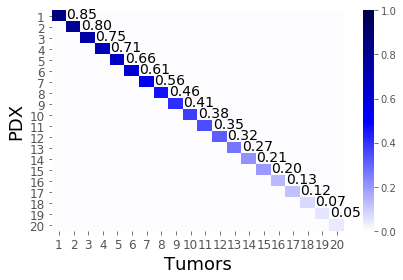

In [7]:
n_pv_display = 20

## Cell lines vs Tumors
sns.heatmap(pv_cell_lines.cosine_similarity_matrix_[:n_pv_display,:n_pv_display], cmap='seismic_r',\
            center=0, vmax=1., vmin=0)

for i in range(n_pv_display-1):
    plt.text(i+1,i+.7,'%1.2f'%pv_cell_lines.cosine_similarity_matrix_[i,i], fontsize=14)

plt.xlabel('Tumors',fontsize=18, color='black')
plt.ylabel('Cell lines',fontsize=18, color='black')
plt.xticks(np.arange(n_pv_display)+0.5, range(1, n_pv_display+1), fontsize=12)
plt.yticks(np.arange(n_pv_display)+0.5, range(1, n_pv_display+1), fontsize=12)
plt.tight_layout()
if cell_line_type == 'BRCA':
    plt.savefig('./figures/fig3_cosine_similarity_pv_cl_%s_%s_pca_%s_pv_%s.png'\
                %(tumor_type, cell_line_type.replace('/',''), n_factors, n_pv),\
               dpi=300)
else:
    plt.savefig('./figures/supp_fig3_cosine_similarity_pv_cl_%s_%s_pca_%s_pv_%s.png'\
                %(tumor_type, cell_line_type.replace('/',''), n_factors, n_pv),\
               dpi=300)
plt.show()


## PDX vs Tumors
sns.heatmap(pv_pdx.cosine_similarity_matrix_[:n_pv_display,:n_pv_display], cmap='seismic_r',\
            center=0, vmax=1., vmin=0)

for i in range(n_pv_display-1):
    plt.text(i+1,i+.7,'%1.2f'%pv_pdx.cosine_similarity_matrix_[i,i], fontsize=14)

plt.xlabel('Tumors',fontsize=18, color='black')
plt.ylabel('PDX',fontsize=18, color='black')
plt.xticks(np.arange(n_pv_display)+0.5, range(1, n_pv_display+1), fontsize=12)
plt.yticks(np.arange(n_pv_display)+0.5, range(1, n_pv_display+1), fontsize=12)
plt.tight_layout()
if pdx_type == 'BRCA':
    plt.savefig('./figures/fig3_cosine_similarity_pv_pdx_%s_%s_pca_%s_pv_%s.png'\
                %(tumor_type, pdx_type, n_factors, n_pv),\
               dpi=300)
else:
    plt.savefig('./figures/supp_fig3_cosine_similarity_pv_pdx_%s_%s_pca_%s_pv_%s.png'\
                %(tumor_type, pdx_type, n_factors, n_pv),\
               dpi=300)
plt.show()

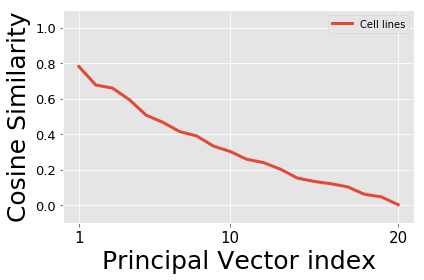

In [8]:
#plt.plot(np.diag(pv_pdx.cosine_similarity_matrix_), label='PDX', linewidth=3)
plt.plot(np.diag(pv_cell_lines.cosine_similarity_matrix_), label='Cell lines', linewidth=3)
plt.legend()
plt.ylim(-0.1,1.1)
plt.yticks(fontsize=13)
ticks = [0] + list(range(9, n_pv, 10))
plt.yticks(color='black')
plt.xticks(ticks, np.array(ticks)+1, fontsize=15, color='black')
plt.xlabel('Principal Vector index', fontsize=25, color='black')
plt.ylabel('Cosine Similarity', fontsize=25, color='black')
plt.tight_layout()
if tumor_type == 'BRCA':
    plt.savefig('./figures/fig3_cosine_similarity_pv_pdx_vs_cell_lines_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
else:
    plt.savefig('./figures/supp_fig3_cosine_similarity_pv_pdx_vs_cell_lines_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)

plt.show()

## Variance explained by principal vectors

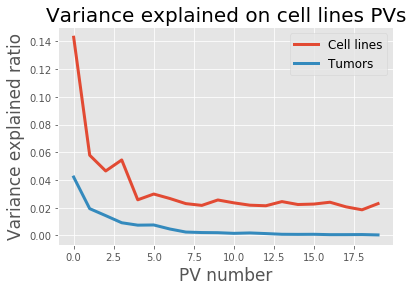

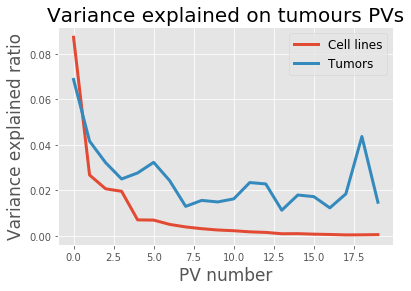

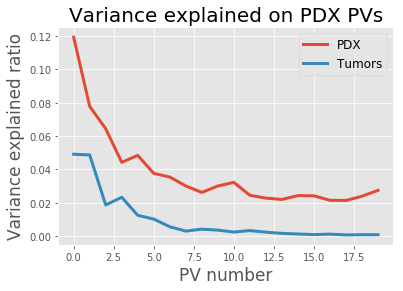

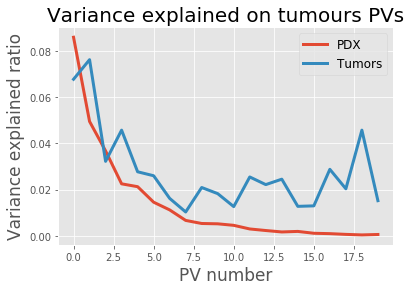

In [9]:
def var_explained(pv, X1):
    var_source = np.var(X1.dot(pv.source_components_.T),0) / np.sum(np.var(X1,0))
    var_target = np.var(X1.dot(pv.target_components_.T),0) / np.sum(np.var(X1,0))
    
    return var_source, var_target

# Cell lines vs Tumors
var_cell_lines_rnaseq = var_explained(pv_cell_lines, X_cell_lines_rnaseq)
var_tumors_rnaseq = var_explained(pv_cell_lines, X_tumors_rnaseq)

plt.plot(var_cell_lines_rnaseq[0], label='Cell lines', linewidth=3)
plt.plot(var_tumors_rnaseq[0], label='Tumors', linewidth=3)
plt.xlabel('PV number', fontsize=17)
plt.ylabel('Variance explained ratio', fontsize=17)
plt.title('Variance explained on cell lines PVs', fontsize=20)
plt.legend(fontsize=12)
if tumor_type == 'BRCA':
    plt.savefig('./figures/fig3_cell_line_var_explained_pv_cell_line_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
else:
    plt.savefig('./figures/supp_fig3_cell_line_var_explained_pv_cell_line_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
plt.show()

plt.plot(var_cell_lines_rnaseq[1], label='Cell lines', linewidth=3)
plt.plot(var_tumors_rnaseq[1], label='Tumors', linewidth=3)
plt.xlabel('PV number', fontsize=17)
plt.ylabel('Variance explained ratio', fontsize=17)
plt.title('Variance explained on tumours PVs', fontsize=20)
plt.legend(fontsize=12)
if tumor_type == 'BRCA':
    plt.savefig('./figures/fig3_tumor_var_explained_pv_cell_line_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
else:
    plt.savefig('./figures/supp_fig3_tumor_var_explained_pv_cell_line_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
plt.show()

# PDX vs Tumors
var_pdx_fpkm = var_explained(pv_pdx, X_pdx_fpkm)
var_tumors_fpkm = var_explained(pv_pdx, X_tumors_fpkm)

plt.plot(var_pdx_fpkm[0], label='PDX', linewidth=3)
plt.plot(var_tumors_fpkm[0], label='Tumors', linewidth=3)
plt.xlabel('PV number', fontsize=17)
plt.ylabel('Variance explained ratio', fontsize=17)
plt.title('Variance explained on PDX PVs', fontsize=20)
plt.legend(fontsize=12)
if tumor_type == 'BRCA':
    plt.savefig('./figures/fig3_pdx_var_explained_pv_pdx_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
else:
    plt.savefig('./figures/supp_fig3_pdx_var_explained_pv_pdx_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
plt.show()

plt.plot(var_pdx_fpkm[1], label='PDX', linewidth=3)
plt.plot(var_tumors_fpkm[1], label='Tumors', linewidth=3)
plt.xlabel('PV number', fontsize=17)
plt.ylabel('Variance explained ratio', fontsize=17)
plt.title('Variance explained on tumours PVs', fontsize=20)
plt.legend(fontsize=12)
if tumor_type == 'BRCA':
    plt.savefig('./figures/fig3_tumor_var_explained_pv_pdx_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
else:
    plt.savefig('./figures/supp_fig3_tumor_var_explained_pv_pdx_pv_tumors_%s_%s_%s_pca_%s_pv_%s.png'\
            %(tumor_type, cell_line_type.replace('/',''), pdx_type, n_factors, n_pv),\
           dpi=300)
plt.show()

## Gene Set Enrichment Analysis of the PVs
PVs' loadings can be enriched to see whether particular pathways are enriched compared to others. Here we use the implementation of GSEA from the Broad Institute and return an enrichment score per pathway per PV. The idea is to show that top PVs contain common information while bottom one contain dissimilar information, namely immune-related and extra-cellular matrix related processes.

### Save data for outside usage

In [10]:
## SAVE PRINCIPAL VECTORS LOADINGS
# Target data is taken for all the GSEA due to its highest sample size. Otherwise
# GSEA is computed on different things.
# Save principal vectors rnaseq source
with open('scores_pv_rnaseq_source_%s.cls'%(n_factors), 'w') as file:
    file.write('#numeric')
    for i, coef in enumerate(pv_cell_lines.source_components_.dot(X_tumors_rnaseq.transpose())):
        file.write('\n#Factor_%s\n'%(i))
        file.write(' '.join(coef.astype(str)))
        
# Save principal vectors rnaseq target
with open('scores_pv_rnaseq_target_%s.cls'%(n_factors), 'w') as file:
    file.write('#numeric')
    for i, coef in enumerate(pv_cell_lines.target_components_.dot(X_tumors_rnaseq.transpose())):
        file.write('\n#Factor_%s\n'%(i))
        file.write(' '.join(coef.astype(str)))
        
# Save principal vectors fpkm source
with open('scores_pv_fpkm_source_%s.cls'%(n_factors), 'w') as file:
    file.write('#numeric')
    for i, coef in enumerate(pv_pdx.source_components_.dot(X_tumors_fpkm.transpose())):
        file.write('\n#Factor_%s\n'%(i))
        file.write(' '.join(coef.astype(str)))
        
# Save principal vectors fpkm target
with open('scores_pv_fpkm_target_%s.cls'%(n_factors), 'w') as file:
    file.write('#numeric')
    for i, coef in enumerate(pv_pdx.target_components_.dot(X_tumors_fpkm.transpose())):
        file.write('\n#Factor_%s\n'%(i))
        file.write(' '.join(coef.astype(str)))
        

## SAVE DATA
# RNAseq for tumors
df = pd.DataFrame(X_tumors_rnaseq, columns=gene_names_rnaseq)
df = df.transpose()
df.columns = tumor_names
df['DESCRIPTION'] = 'na'
df['NAME'] = gene_names_rnaseq
df = df.set_index(['NAME', 'DESCRIPTION'])
df.to_csv('expression_tumors_rnaseq.txt', sep='\t')

# FPKM for tumors
df = pd.DataFrame(X_tumors_fpkm, columns=gene_names_fpkm)
df = df.transpose()
df.columns = tumor_names
df['DESCRIPTION'] = 'na'
df['NAME'] = gene_names_fpkm
df = df.set_index(['NAME', 'DESCRIPTION'])
df.to_csv('expression_tumors_fpkm.txt', sep='\t')

To launch the GSEA on the PVs, change the file gsea_pv_target.sh and gsea_pv_source.sh for the output you want to use (line 53 in both). Then on the command line, launch:
<br/>
<em>sh launch_gsea.sh n_pv</em>
<br/>
where n_pv is your number of PVs.

### Read GSEA data from Broad implementation
Once Gene Set Enrichment has been performed, data can be read and processed here.
<br/>
<br/>
##### Instructions to launch GSEA script
<ul>
    <li> Change line 53 of gsea_pv_target.sh and gsea_pv_source.sh in order to change the folder GSEA results would fold into.
    <li> Go to your terminal and launch "sh launch_gsea_pv.sh [n_pv]" where [n_pv] is the number of principal vectors you have in your study (in text, 20 for tissue vs tissue, and 70 for all vs tissue).
</ul>
Results will appear in ./output/ and can be used in the next element.

### Global view of PV results
#### Method for reading data

In [88]:
def read_gsea_results(gs, n_pv,name_folder,
                     source_name='cell_line',
                     target_name='tumor'):
    """
    Read results from GSEA on PVs.
    Returns a dictionnary of DataFrame.
    """
    
    gsea_results = dict()
    list_dir = os.listdir('%s/'%(name_folder))
    
    for number_components in range(0,n_pv):
        # Retrieve results for source
        source_dir = [e for e in list_dir if '%s_factor_%s.'%(source_name, number_components) in e][0]
        source_file_neg = [e for e in os.listdir('%s/%s/'%(name_folder, source_dir))\
                       if 'gsea_report_for_Factor_%s_neg'%(number_components) in e and 'xls' in e][0]
        source_file_pos = [e for e in os.listdir('%s/%s/'%(name_folder, source_dir))\
                       if 'gsea_report_for_Factor_%s_pos'%(number_components) in e and 'xls' in e][0]
        source_neg_df = pd.read_csv('%s/%s/%s'%(name_folder, source_dir, source_file_neg), sep='\t')
        source_pos_df = pd.read_csv('%s/%s/%s'%(name_folder, source_dir, source_file_pos), sep='\t')
        source_df = pd.concat([source_neg_df, source_pos_df])

        # Retrieve results for target
        target_dir = [e for e in list_dir if '%s_factor_%s.'%(target_name, number_components) in e][0]
        target_file_neg = [e for e in os.listdir('%s/%s/'%(name_folder, target_dir))\
                       if 'gsea_report_for_Factor_%s_neg'%(number_components) in e and 'xls' in e][0]
        target_file_pos = [e for e in os.listdir('%s/%s/'%(name_folder, target_dir))\
                       if 'gsea_report_for_Factor_%s_pos'%(number_components) in e and 'xls' in e][0]
        target_neg_df = pd.read_csv('%s/%s/%s'%(name_folder, target_dir, target_file_neg), sep='\t')
        target_pos_df = pd.read_csv('%s/%s/%s'%(name_folder, target_dir, target_file_pos), sep='\t')
        target_df = pd.concat([target_neg_df, target_pos_df])

        # Merge source and target results
        df = source_df.merge(target_df,
                             on='NAME',
                             how='left',
                             suffixes=['_source', '_target']
                            )[['NAME', 'FDR q-val_source', 'FDR q-val_target', 'NES_source', 'NES_target']]
        df.columns = [
            'NAME',
            'FDR_source_%s'%(number_components),
            'FDR_target_%s'%(number_components),
            'NES_source_%s'%(number_components),
            'NES_target_%s'%(number_components)
        ]
        gsea_results[number_components] = df

    return gsea_results


def dataframe_gsea_results(gsea_results, threshold):
    """
    Puts results of GSEA within a DataFrame that can be used
    versatily for plotting the heatmap.
    """
    
    df = gsea_results[0]
    n_pv = len(gsea_results)
    for number_components in range(1, n_pv):
        df = df.merge(gsea_results[number_components], on='NAME', how='left')

    # Highlight significant pathways for NES computation 
    # i.e. put to 0 the NES of non-significant pathways, according to FDR threshold
    for pv_index in range(n_pv):
        for system in ['source', 'target']:
            fdr_col_name = 'FDR_%s_%s'%(system, pv_index)
            nes_col_name = 'NES_%s_%s'%(system, pv_index)
            sign_col_name = 'SIGNIFICANCE_%s_%s'%(system, pv_index)
            df[sign_col_name] = (df[fdr_col_name] <= threshold).astype(int)
            df[nes_col_name] = df[nes_col_name] * df[sign_col_name]

    nes_columns = ['NAME'] + [
        'NES_%s_%s'%(system, pv_index)
        for pv_index in range(n_pv)
        for system in ['source', 'target']
    ]
    df = df[nes_columns]

    # Work on dataframe ergonomy
    df = df.set_index('NAME') # set name as index
    df = df[(df.T != 0).any()] # removes column with only 0
    
    # Puts DataFrame with MultiIndex on columns
    cols = df.columns.str.extract(r'(.+)_(\d+)', expand=True)
    cols[1] = 'PV_' + cols[1]
    cols[0] = cols[0].astype(str).apply(lambda x: x[4:])
    df.columns = pd.MultiIndex.from_arrays((cols[1], cols[0]))

    return df

#### Heatmap of NES for enriched gene set
Per default, non-enriched gene sets are set to 0. Heatmap of NES for enriched gene sets is drawn. These values are ordered by values of the top PVs and the bottom one to show contrast.

/home/s.mourragui/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


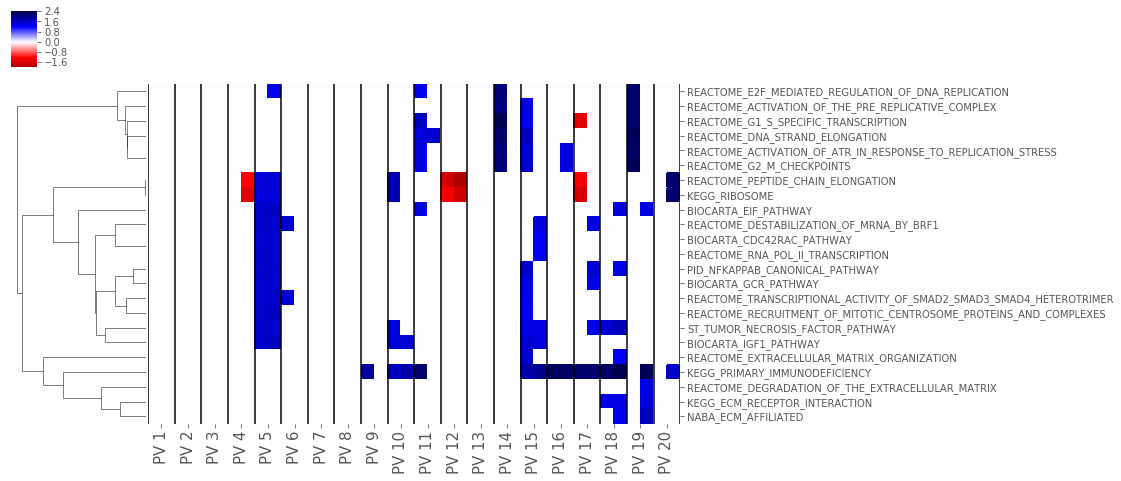

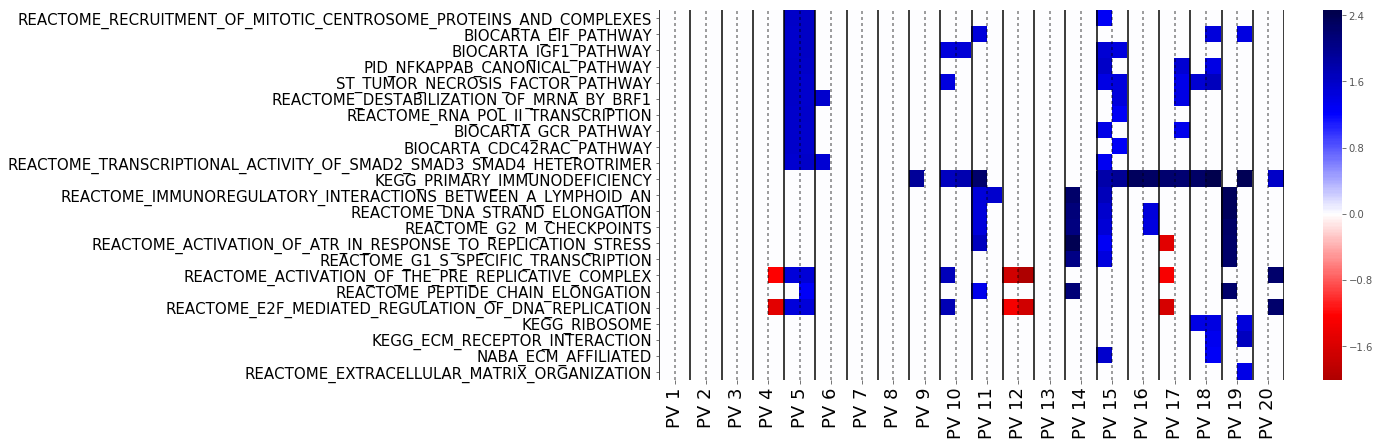

In [98]:
## ENRICHMENT FOR CELL LINES vs TUMORS
gs = 'c2.cp'
n_pv = 20
threshold = 0.25
name_folder = '/DATA/s.mourragui/results/pv_gsea/output/%s_skin_skin_rnaseq_tumor_cl_%s'%(gs,n_pv)

gsea_results = read_gsea_results(gs, n_pv, name_folder, 'cell_line', 'tumors')
cl_t_df = dataframe_gsea_results(gsea_results, threshold)

# Filter pathways
select_pathway = True
pathway_file = './input/top_10_gene_set_skin_skin_cl_t.txt'
with open(pathway_file, 'r') as f:
    pathways_selected = f.read()
    pathways_selected = pathways_selected.split('\n')
if select_pathway:
    cl_t_df = cl_t_df[np.isin(cl_t_df.index, pathways_selected)]

# Plot heatmap
g_cl = sns.clustermap(cl_t_df.dropna(),
                    cmap='seismic_r',
                    center=0,
                    cbar_kws={"shrink": 0.4},
                    col_cluster=False, row_cluster=True,
                    metric='cosine',
                    figsize=(8+0.2*n_pv,3+0.2*cl_t_df.shape[0]))

ax = g_cl.ax_heatmap
for i in range(0, n_pv+1):
    ax.axvline(2*i, color='black')

ax.set_xticks(np.arange(1,2*n_pv+1,2))
ax.set_xticklabels(['PV %s'%(e+1) for e in range(n_pv)], fontsize=15)
ax.set_yticks(np.arange(0,cl_t_df.shape[0])+.5)
ax.set_yticklabels(cl_t_df.index[g_cl.dendrogram_row.reordered_ind], fontsize=10)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()
plt.savefig('./figures/fig3_gsea_clustermap_cl_t_%s_%s_%s_%s_threshold_%s%s.png'%(tumor_type,
                                                                              cell_line_type.replace('/',''),
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()

# Same with Heatmap instead
if select_pathway:
    cl_t_df = cl_t_df.reindex(pathways_selected)
else:
    cl_t_df = cl_t_df.reindex(cl_t_df.index[g_cl.dendrogram_row.reordered_ind])

fig = plt.figure(figsize=(8+0.3*n_pv,2+0.2*cl_t_df.shape[0]))
ax = sns.heatmap(cl_t_df.dropna(), cmap='seismic_r', center=0)
for i in range(0, n_pv+1):
    ax.axvline(2*i, color='black')
for i in range(0, n_pv):
    l = ax.axvline(2*i+1, color='black', dashes=[2,2], alpha=0.5)
    
ax.set_xticks(np.arange(1,2*n_pv+1,2))
ax.set_xticklabels(['PV %s'%(e+1) for e in range(n_pv)], fontsize=18, color='black')
ax.set_yticklabels(cl_t_df.index, fontsize=15, color='black')
ax.set_ylabel('')
ax.set_xlabel('')
plt.savefig('./figures/fig3_gsea_heatmap_cl_t_%s_%s_%s_%s_threshold_%s%s.png'%(tumor_type,
                                                                              cell_line_type.replace('/',''),
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()

# Save dataframe to CSV
if not select_pathway:
    cl_t_df.to_csv('./output/gsea_NES_per_pv_%s_%s_cl_t_n_%s_p_%s_threshold_%s.csv'%(tumor_type,
                                                                               cell_line_type.replace('/',''),
                                                                               n_pv,
                                                                               gs,
                                                                               threshold)
    )

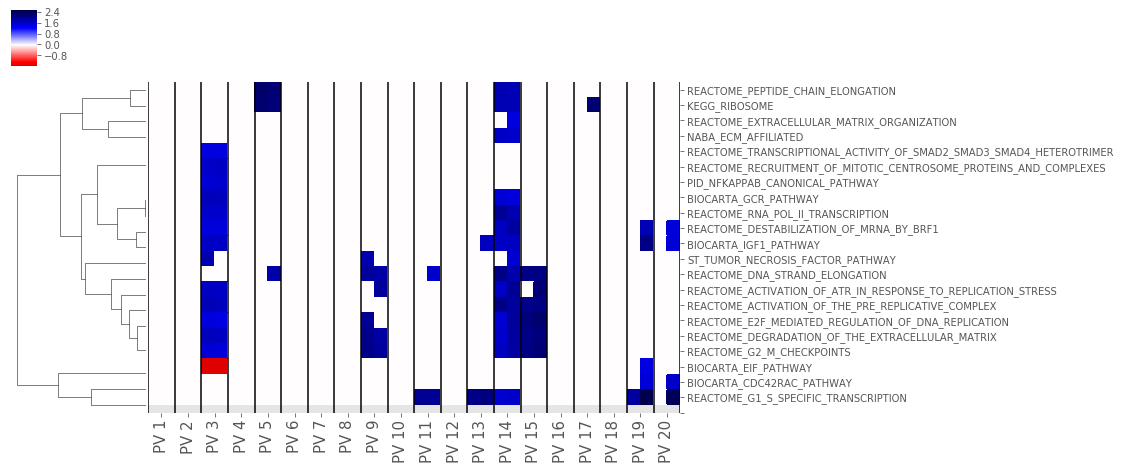

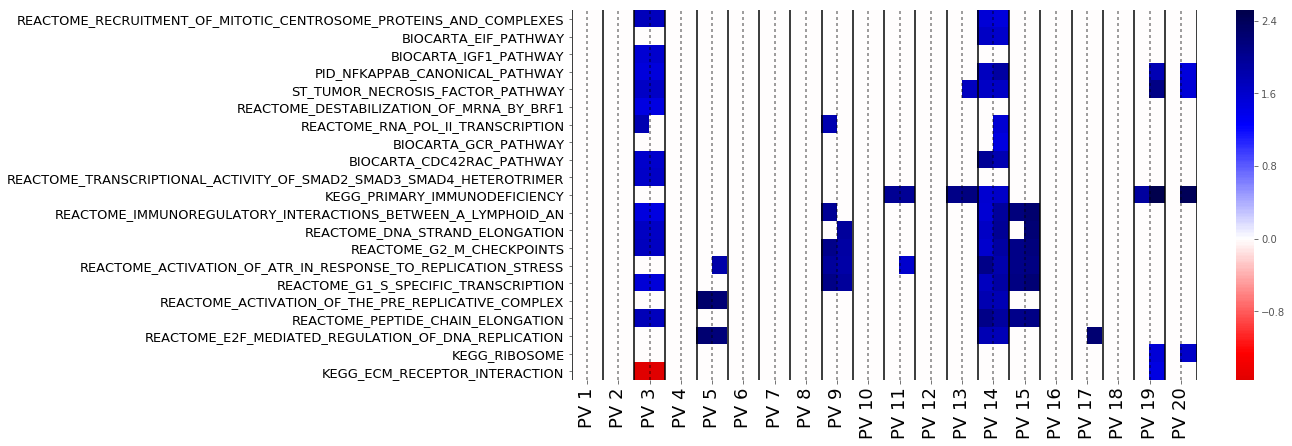

In [100]:
## ENRICHMENT FOR PDX vs TUMORS
gs = 'c2.cp'
n_pv = 20
threshold = 0.1
name_folder = '/DATA/s.mourragui/results/pv_gsea/output/%s_skin_skin_fpkm_tumor_pdx_%s'%(gs,n_pv)

gsea_results = read_gsea_results(gs, n_pv, name_folder, 'pdx', 'tumors')
pdx_t_df = dataframe_gsea_results(gsea_results, threshold)

# Filter pathways
select_pathway = True
pathway_file = './input/top_10_gene_set_skin_skin_cl_t.txt'
with open(pathway_file, 'r') as f:
    pathways_selected = f.read()
    pathways_selected = pathways_selected.split('\n')
if select_pathway:
    pdx_t_df = pdx_t_df[np.isin(pdx_t_df.index, pathways_selected)]

# Plot Clustermap
g_pdx = sns.clustermap(pdx_t_df.dropna(),
                   cmap='seismic_r',
                   center=0,
                   cbar_kws={"shrink": 0.1},
                   col_cluster=False,
                   metric='cosine',
                   figsize=(8+0.2*n_pv,3+0.2*pdx_t_df.shape[0]))
ax = g_pdx.ax_heatmap
    
for i in range(0, n_pv+1):
    ax.axvline(2*i, color='black')

ax.set_xticks(np.arange(1,2*n_pv+1,2))
ax.set_xticklabels(['PV %s'%(e+1) for e in range(n_pv)], fontsize=15)
ax.set_yticks(np.arange(0,pdx_t_df.shape[0])+.5)

ax.set_yticklabels(pdx_t_df.index[g_pdx.dendrogram_row.reordered_ind], fontsize=10)

ax.set_ylabel('')
ax.set_xlabel('')
plt.savefig('./figures/fig3_gsea_%s_pdx_t_%s_%s_%s_%s_threshold_%s%s.png'%('clustermap',
                                                                            tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()

# Same with Heatmap instead ordered as in pathways selected.
pdx_t_df = pdx_t_df.reindex(pathways_selected)

fig = plt.figure(figsize=(8+0.3*n_pv,2+0.2*pdx_t_df.shape[0]))
ax = sns.heatmap(pdx_t_df.dropna(), cmap='seismic_r', center=0)
for i in range(0, n_pv+1):
    ax.axvline(2*i, color='black')
for i in range(0, n_pv):
    l = ax.axvline(2*i+1, color='black', dashes=[2,2], alpha=0.5)
    
ax.set_xticks(np.arange(1,2*n_pv+1,2))
ax.set_xticklabels(['PV %s'%(e+1) for e in range(n_pv)], fontsize=18, color='black')
ax.set_yticklabels(pdx_t_df.index, fontsize=13, color='black')
ax.set_ylabel('')
ax.set_xlabel('')
plt.savefig('./figures/fig3_gsea_heatmap_pdx_t_%s_%s_%s_%s_threshold_%s%s.png'%(tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()


# Save dataframe to CSV
if not select_pathway:
    pdx_t_df.to_csv('./output/gsea_NES_per_pv_%s_%s_pdx_t_n_%s_p_%s_threshold_%s.csv'%(tumor_type,
                                                                               pdx_type,
                                                                               n_pv,
                                                                               gs,
                                                                               threshold)
    )

#### Similarity in terms of NES
Geometric similarity has been computed for the principal vectors. If we add prior knowledge, i.e. restrict to a gene sets collection, we see here how this similarity changes.

In [92]:
## SIMILARITY BETWEEN CELL LINES AND TUMORS

collection_names = ['hallmark', 'cp', 'kegg', 'reactome', 'biocarta', 'cgp']
collections = ['h.all', 'c2.cp', 'c2.cp.kegg', 'c2.cp.reactome', 'c2.cp.biocarta', 'c2.cgp']
n_pv = 20
threshold = np.inf
select_pathway = False

folders = ['/DATA/s.mourragui/results/pv_gsea/output/%s_skin_skin_rnaseq_tumor_cl_%s'%(c,n_pv)
           for c in collections]

gsea_results = {c:read_gsea_results(c, n_pv, f, 'cell_line', 'tumors')
                for c,f in zip(collections, folders)}
gsea_results = {c:dataframe_gsea_results(g, threshold).dropna() for c,g in gsea_results.items()}

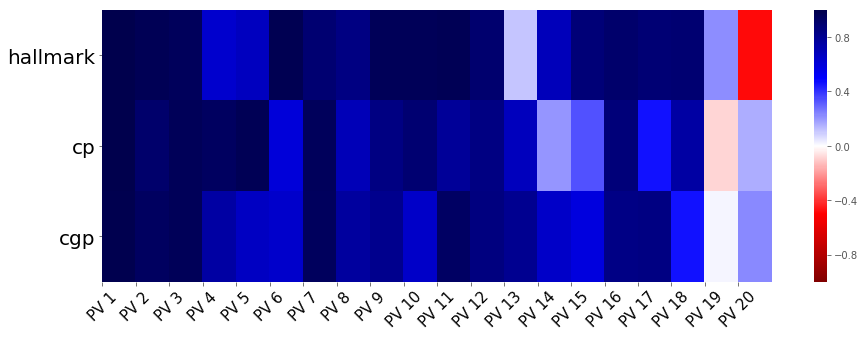

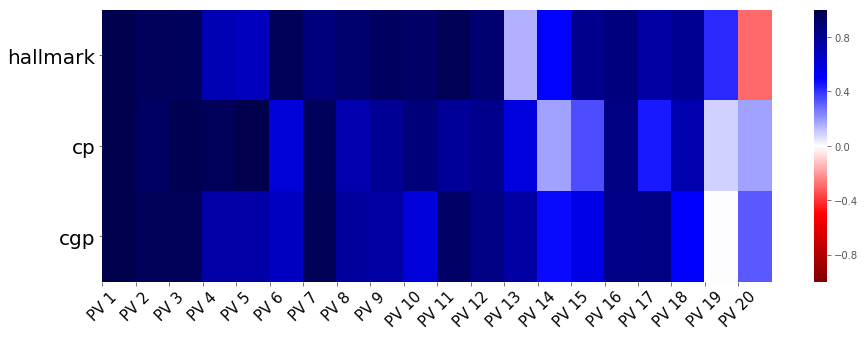

In [95]:
pearson_correlation_gs = np.zeros((len(collections), n_pv))
spearman_correlation_gs = np.zeros((len(collections), n_pv))

for gs_index, gs in enumerate(gsea_results):
    for i in range(n_pv):
        pv_name = 'PV_%s'%(i)
        a = gsea_results[gs]
        pearson_correlation_gs[gs_index, i] = (scipy.stats.pearsonr(a[(pv_name,'source')], a[(pv_name,'target')]))[0]
        spearman_correlation_gs[gs_index, i] = (scipy.stats.spearmanr(a[(pv_name,'source')], a[(pv_name,'target')]))[0]
    
plt.figure(figsize=(15,5))
sns.heatmap(pearson_correlation_gs, cmap='seismic_r', center=0, vmin=-1, vmax=1)
ticks = [0] + list(range(1,n_pv,1))
plt.xticks(ticks, ['PV %s'%(e+1) for e in ticks], rotation=45, fontsize=15, color='black')
plt.yticks(np.arange(len(collection_names))+0.5, collection_names, rotation=0, fontsize=20, color='black')
plt.savefig('./figures/fig3_gsea_collection_pearson_cl_t_%s_%s_%s_threshold_%s.png'%(tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              threshold),
           dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,5))
sns.heatmap(spearman_correlation_gs, cmap='seismic_r', center=0, vmin=-1, vmax=1)
ticks = [0] + list(range(1,n_pv,1))
plt.xticks(ticks, ['PV %s'%(e+1) for e in ticks], rotation=45, fontsize=15, color='black')
plt.yticks(np.arange(len(collection_names))+0.5, collection_names, rotation=0, fontsize=20, color='black')

plt.savefig('./figures/fig3_gsea_collection_spearman_cl_t_%s_%s_%s_threshold_%s.png'%(tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              threshold),
           dpi=300, bbox_inches='tight')
plt.show()

In [53]:
## SIMILARITY BETWEEN PDXs AND TUMORS

collection_names = ['hallmark', 'cp', 'kegg', 'reactome', 'biocarta', 'cgp']
collections =  ['h.all', 'c2.cp', 'c2.cp.kegg', 'c2.cp.reactome', 'c2.cp.biocarta', 'c2.cgp']
n_pv = 70
threshold = np.inf

folders = ['/DATA/s.mourragui/results/pv_gsea/output/%s_breast_all_fpkm_tumor_pdx_%s'%(c,n_pv)
           for c in collections]

gsea_results = {c:read_gsea_results(c, n_pv, f, 'pdx', 'tumors')
                for c,f in zip(collections, folders)}
gsea_results = {c:dataframe_gsea_results(g, threshold).dropna() for c,g in gsea_results.items()}

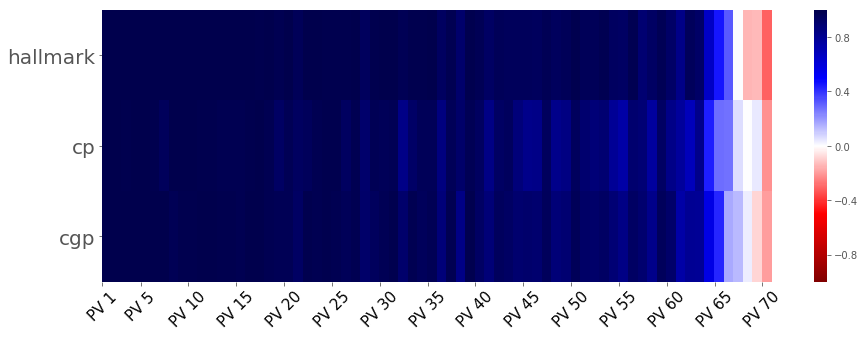

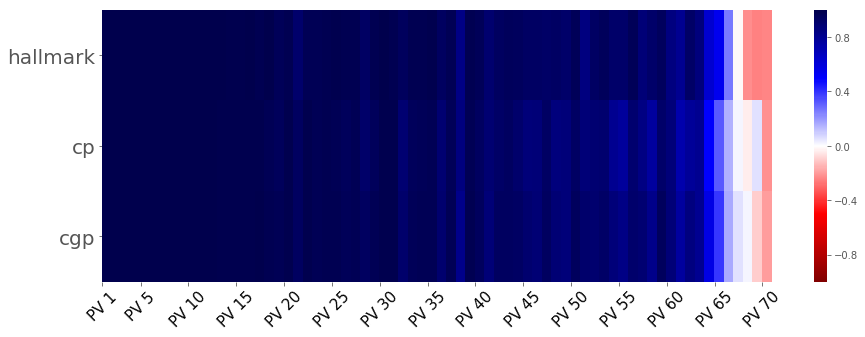

In [54]:
pearson_correlation_gs = np.zeros((len(collections), n_pv))
spearman_correlation_gs = np.zeros((len(collections), n_pv))

for gs_index, gs in enumerate(gsea_results):
    for i in range(n_pv):
        pv_name = 'PV_%s'%(i)
        a = gsea_results[gs]
        pearson_correlation_gs[gs_index, i] = (scipy.stats.pearsonr(a[(pv_name,'source')], a[(pv_name,'target')]))[0]
        spearman_correlation_gs[gs_index, i] = (scipy.stats.spearmanr(a[(pv_name,'source')], a[(pv_name,'target')]))[0]
    
plt.figure(figsize=(15,5))
sns.heatmap(pearson_correlation_gs, cmap='seismic_r', center=0, vmin=-1, vmax=1)
ticks = [0] + list(range(4,n_pv,5))
plt.xticks(ticks, ['PV %s'%(e+1) for e in ticks], rotation=45, fontsize=15, color='black')
plt.yticks(np.arange(len(collection_names))+0.5, collection_names, rotation=0, fontsize=20)
plt.savefig('./figures/fig3_gsea_collection_pearson_pdx_t_%s_%s_%s_%s_threshold_%s%s.png'%(tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,5))
sns.heatmap(spearman_correlation_gs, cmap='seismic_r', center=0, vmin=-1, vmax=1)
ticks = [0] + list(range(4,n_pv,5))
plt.xticks(ticks, ['PV %s'%(e+1) for e in ticks], rotation=45, fontsize=15, color='black')
plt.yticks(np.arange(len(collection_names))+0.5, collection_names, rotation=0, fontsize=20)
plt.savefig('./figures/fig3_gsea_collection_spearman_pdx_t_%s_%s_%s_%s_threshold_%s%s.png'%(tumor_type,
                                                                              pdx_type,
                                                                              n_pv,
                                                                              gs,
                                                                              threshold,
                                                                              '_selected' if select_pathway else ''),
           dpi=300, bbox_inches='tight')
plt.show()